In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
class NaiveModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 1000), nn.ReLU(), nn.Linear(1000, 2), nn.ReLU())

    def forward(self, X):
        return self.linear(X)


In [119]:
def train(x, y, model, epoch_num=1000):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss = nn.MSELoss()
    for epoch in range(epoch_num):
        predict = model(x)
        _loss = loss(predict, y)
        optimizer.zero_grad()
        _loss.backward()
        optimizer.step()
        if epoch % (epoch_num // 20) == 0:
            print(f"epoch : {epoch}, loss : {_loss.item()}")

    return model

In [120]:
def read_files(file_names):
    frames = []
    for file in file_names:
        df = pd.read_csv(file, encoding="utf-8")
        frames.append(df)
    return pd.concat(frames).reset_index(drop=True)
        

In [217]:
def normalize(x):
    min_x = torch.min(x)
    max_x = torch.max(x)
    if torch.abs(min_x - max_x) < 1e-6:
        return torch.ones_like(x)
    return (x - min_x) / (max_x - min_x)

def fake_data(num):
    x_list, y_list = [], []
    
    for i in range(num):
        t = torch.range(1, 9)
        t = torch.reshape(t, (9, 1))
        x = torch.rand(1).item() * torch.ones_like(t) * torch.rand(1).item() * 100
        y = t ** 1.5 + torch.abs(torch.randn_like(t))
        z = 1.2 * (y ** 1.2 + x**1.5) + torch.abs(torch.randn_like(t))
        x = normalize(x)
        y = normalize(y)
        t = normalize(t)
        z = normalize(z)
        x = torch.concat((x, t), 1)
        x_list.append(x)
        y = torch.concat((y, z), 1)
        y_list.append(y)
    return x_list, y_list
        
        

In [218]:
_data = fake_data(100)
train_x, train_y = _data[0][:80], _data[1][:80]
train_x = torch.concat(tuple(train_x), 0)
train_y = torch.concat(tuple(train_y), 0)

/Users/galan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  if sys.path[0] == "":


In [219]:
model = NaiveModel()
model = train(train_x, train_y, model)

epoch : 0, loss : 0.1712976098060608
epoch : 50, loss : 0.0015536652645096183
epoch : 100, loss : 0.0009854394011199474
epoch : 150, loss : 0.0008506288868375123
epoch : 200, loss : 0.000833745812997222
epoch : 250, loss : 0.0008257051231339574
epoch : 300, loss : 0.0008212169632315636
epoch : 350, loss : 0.0007818887825123966
epoch : 400, loss : 0.0007086219266057014
epoch : 450, loss : 0.0006998900789767504
epoch : 500, loss : 0.0006971010006964207
epoch : 550, loss : 0.0006959012243896723
epoch : 600, loss : 0.0006952580297365785
epoch : 650, loss : 0.0006948991795070469
epoch : 700, loss : 0.0006946960929781199
epoch : 750, loss : 0.0006945821223780513
epoch : 800, loss : 0.0006945168133825064
epoch : 850, loss : 0.000694479385856539
epoch : 900, loss : 0.0006944580818526447
epoch : 950, loss : 0.0006944454507902265


In [220]:
test_x, test_y = _data[0][80:], _data[1][80:]
test_x = torch.concat(tuple(test_x), 0)
test_y = torch.concat(tuple(test_y), 0)
predict_y = model(test_x)
nn.MSELoss()(predict_y, test_y)

tensor(0.0008, grad_fn=<MseLossBackward0>)

In [221]:
plot_x = [test_x[i * 9: i * 9 + 9] for i in range(len(test_x)) if i * 9 + 9 < len(test_x)]
plot_y = [test_y[i * 9: i * 9 + 9] for i in range(len(test_y)) if i * 9 + 9 < len(test_y)]
_pre_y = predict_y.data.numpy()
plot_pre = [_pre_y[i * 9: i * 9 + 9] for i in range(len(_pre_y)) if i * 9 + 9 < len(_pre_y)]

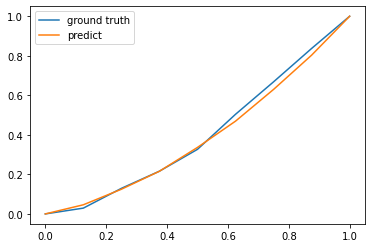

In [224]:
x_axis = plot_x[0][:, 1]
plt.plot(x_axis, plot_y[6][:, 1], label="ground truth")
plt.plot(x_axis, plot_pre[6][:, 1], label="predict")
plt.legend()
    